In [1]:
import sys, os, platform, pickle
from datetime import datetime, timedelta
import numpy as np
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm

In [2]:
sys.path.append(os.path.join(os.getcwd(), '../'))
os.getcwd()

'D:\\Users\\17535\\Personal\\Study\\ANU 2021 S1\\COMP3740\\networked-popularity'

In [3]:
from utils.helper import Timer, str2obj, gini
from utils.data_loader import DataLoader
from utils.plot import ColorPalette, concise_fmt, hide_spines, stackedBarPlot
data_prefix = 'data/' # ../

In [5]:
timer = Timer()
timer.start()



target_day_indices = [0, 15, 30, 45]
color_cycle_4 = ColorPalette.CC4
date_labels = ['Sep 01, 2018', 'Sep 16, 2018', 'Oct 01, 2018', 'Oct 16, 2018']

# == == == == == == Part 2: Load video views == == == == == == #
data_loader = DataLoader()
data_loader.load_video_views()
# data_loader.cwd
embed_view_dict = data_loader.embed_view_dict
embed_avg_view_dict = data_loader.embed_avg_view_dict
num_videos = data_loader.num_videos

# target_day_view_list = [[], [], [], []]
# for embed in range(num_videos):
#     for target_idx, target_day in enumerate(target_day_indices):
#         target_day_view_list[target_idx].append(embed_view_dict[embed][target_day])


>>> Daily view data has been loaded!


In [6]:
NUM_REL = 15
T = 63
edges = []
# embed_indegree_dict = {embed: np.zeros((T,)) for embed in np.arange(num_videos)}  # daily indegree for each embed
# zero_indegree_list = []  # percentage of zero indegree for each day
# num_edges_list = []  # number of total edges for each day
for t in range(T):
    filename = 'network_{0}.p'.format((datetime(2018, 9, 1) + timedelta(days=t)).strftime('%Y-%m-%d'))
#     indegree_list = []
    daily_edges = []
    with open(os.path.join(data_prefix, 'network_pickle', filename), 'rb') as fin:
        network_dict = pickle.load(fin)
        # embed_tar: [(embed_src, pos_src, view_src), ...]
        for tar_embed in range(num_videos):
#             indegree_value = 0
            for x in network_dict[tar_embed]:
                if x[1] < NUM_REL:
#                     indegree_value += 1
                    daily_edges.append((x[0], tar_embed))
#             embed_indegree_dict[tar_embed][t] = indegree_value
#             indegree_list.append(indegree_value)
#     indegree_counter = Counter(indegree_list)
#     zero_indegree_list.append(indegree_counter[0] / num_videos)
#     num_edges_list.append(sum(indegree_list))
    edges.append(daily_edges)
#     print('>>> Finish loading day {0}...'.format(t + 1))
print('>>> Network structure has been loaded!')
# print('\n>>> Average number of edges: {0:.0f}, max: {1:.0f}, min: {2:.0f}, sum: {3:.0f}'.format(sum(num_edges_list) / len(num_edges_list), max(num_edges_list), min(num_edges_list),sum(num_edges_list)))


>>> Finish loading day 1...
>>> Finish loading day 2...
>>> Finish loading day 3...
>>> Finish loading day 4...
>>> Finish loading day 5...
>>> Finish loading day 6...
>>> Finish loading day 7...
>>> Finish loading day 8...
>>> Finish loading day 9...
>>> Finish loading day 10...
>>> Finish loading day 11...
>>> Finish loading day 12...
>>> Finish loading day 13...
>>> Finish loading day 14...
>>> Finish loading day 15...
>>> Finish loading day 16...
>>> Finish loading day 17...
>>> Finish loading day 18...
>>> Finish loading day 19...
>>> Finish loading day 20...
>>> Finish loading day 21...
>>> Finish loading day 22...
>>> Finish loading day 23...
>>> Finish loading day 24...
>>> Finish loading day 25...
>>> Finish loading day 26...
>>> Finish loading day 27...
>>> Finish loading day 28...
>>> Finish loading day 29...
>>> Finish loading day 30...
>>> Finish loading day 31...
>>> Finish loading day 32...
>>> Finish loading day 33...
>>> Finish loading day 34...
>>> Finish loading day 

length of 1 -> 1 is 0
length of 1 -> 2 is 1
length of 1 -> 3 is 1
length of 2 -> 2 is 0
length of 3 -> 3 is 0
length of 4 -> 4 is 0


In [26]:
it

<generator object all_pairs_shortest_path_length at 0x00000157D2A7E510>

60348

In [19]:
# example = nx.DiGraph()
# example.add_edges_from([(1,2), (1,3)])
# example.add_node(4)
# it = nx.shortest_path_length(example)
# for src, dct in it:
#     for i in dct.keys():
#         print("length of {0} -> {1} is {2}".format(src, i, dct[i]))

# G1 = nx.DiGraph()
# G1.add_edges_from(edges[1])
# graph_lst.append(G)
# len(list(G1.nodes))

# leng = [len(i) for i in nx.connected_components(G1.to_undirected())]
# sum(leng)

# sum(num_edges_list) / num_videos / T
# np.mean(zero_indegree_list)

0.3345351772582593

In [21]:
import pandas as pd

G1 = nx.DiGraph()
G1.add_edges_from(edges[1])
G1 = G1.reverse(copy=False)  # want nodes to the target
# length = nx.floyd_warshall_numpy(G1, cutoff=5)
# shortest_length = []
length = dict(nx.all_pairs_shortest_path_length(G1, cutoff=5))


In [38]:
shortest_length = []
for i in length.keys():
    shortest_length.append(np.mean(np.array(list(length[i].values()))))

In [41]:
shortest_length = np.array(shortest_length)
pos = shortest_length[shortest_length>1]
len(pos[pos<2])/num_videos

0.10678300954889694

In [42]:
shortest_length

array([1.        , 1.6       , 0.        , ..., 0.        , 3.21170396,
       0.66666667])

(array([0.63830413, 0.24893962, 0.19015242, 0.12321152, 0.12720449,
        0.1420355 , 0.15877912, 0.15169915, 0.15720206, 0.08740904]),
 array([0.        , 0.49384251, 0.98768502, 1.48152753, 1.97537004,
        2.46921255, 2.96305506, 3.45689757, 3.95074008, 4.44458259,
        4.9384251 ]),
 <BarContainer object of 10 artists>)

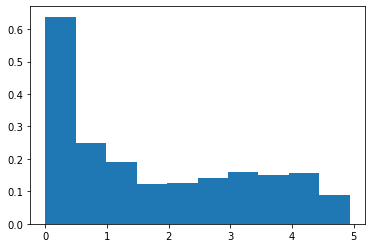

In [45]:
plt.hist(shortest_length, bins=10, density=True)

In [18]:
n = 60000**3/10**7
n/60**3

100.0

In [ ]:
df = pd.DataFrame.from_dict(length)
df

In [11]:
def path(G):
    G = G.reverse(copy=False)  # want nodes to the target
#     not_connected = [None for _ in range(len(G.nodes))]  # default is num_nodes-1, meaning disconnected
#     shortest_length = [None for _ in range(len(G.nodes))]  # 0 means disconnected
#     reversed_shortest_length = [None for _ in range(len(G.nodes))]  # 0 means disconnected
#     not_connected = []
    shortest_length = []
#     reversed_shortest_length = []

    it = nx.shortest_path_length(G)
    num_nodes = len(G)
    src_len = {}
    for src, dct in tqdm(it):
        src_len[src] = np.array(list(dct.values()))
#         len_not_connected = num_nodes - len(dct.keys())
#         if src>=len(G.nodes):
#             print(src)
#         not_connected[src] = len_not_connected
#         not_connected.append(len_not_connected)
    for i in tqdm(src_len.values()): 
        shortest_length.append(np.mean(i))
#         reversed_values = values[values!=0]
        
#         print(type(values))
#         print(type(reversed_values))
#         print(values)
#         print(reversed_values)
#         reversed_shortest_length.append(np.sum(1/reversed_values))
    
#         src_shortest_length = 0
#         src_reversed_shortest_length = 0
#         for tgt in dct.keys():
#             src_shortest_length += dct[tgt]
#             if dct[tgt] != 0:
#                 src_reversed_shortest_length += 1/dct[tgt]
# #         shortest_length[src] = src_shortest_length
#         shortest_length.append(src_shortest_length)
# #         reversed_shortest_length[src] = src_reversed_shortest_length
#         reversed_shortest_length.append(src_reversed_shortest_length)
        
#     return np.mean(not_connected), np.mean(shortest_length), np.mean(reversed_shortest_length)
    return np.mean(shortest_length)



In [12]:
G1 = nx.DiGraph()
G1.add_edges_from(edges[1])
# graph_lst.append(G)
# len(list(G1.nodes))
# not_connected, shortest_length, reversed_shortest_length = path(G1)
# avg_not_connected = np.mean(not_connected)
# avg_shortest_length = np.mean(shortest_length)
# avg_reversed_shortest_length = np.mean(reversed_shortest_length)
print(path(G1))




520it [00:16, 32.40it/s]


KeyboardInterrupt: 

In [41]:
graph_lst = []
for i in edges:
    G = nx.DiGraph()
    G.add_edges_from(i)
    graph_lst.append(G)

<ipython-input-41-9ec77d3bae74>:2: RuntimeWarning: divide by zero encountered in true_divide
  1/a


array([1. , 0.5, inf])

In [ ]:
not_connected = []
shortest_length = []
reversed_shortest_length = []

for C in graph_lst
    n, s, r = path(C)
    not_connected.append(n)
    not_connected.append(s)
    not_connected.append(r)

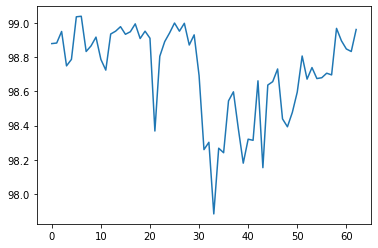

In [35]:


lcc_lst = [100*len(max(nx.connected_components(G.to_undirected()), key=len))/num_videos for G in graph_lst]
plt.plot(lcc_lst)

# focus on disconnected points

In [33]:
diam_lst = [nx.diameter(G) for G in graph_lst]

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [27]:
nx.diameter?

In [37]:
num_videos

60740